<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<br>  
<p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p>
<p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p>
    
<br>
<br>   
<br>
<br>

<h1 style="text-align: center"> Data Science Programming 2 (Python) </h1>
<h1 style="text-align: center"> Midterm Project: Used car prices in India </h1> 

<br>
<br>


<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2006</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Bekdaulet Magadanov,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Akzhurek Askarbek,</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Merey Orazaly</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Kaisar Mussalim</p>

<br>
<br>

<p style="text-align: center; font-size: 18px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

### Outline:
1. Explore the dataset.     
2. Data preprocessing. Feature engineering. Encodings, generating the features from сolumns. 
3. Explanatory data analysis. Exploring the features, visualizations etc.
4. Supervised learning. Build regression model for prediction the price of cars. 
5. Conclusion.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## 1. Explore the dataset.

In [2]:
#Load and observe dataset
cardekho = pd.read_csv('Cardekho_Extract.csv')
cardekho.head()

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [3]:
cardekho.shape

(20026, 16)

**Comment: There are data about 20 thousand used cars scraped from www.cardekho.com**

In [4]:
cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source.Name            20026 non-null  object 
 1   web-scraper-order      20026 non-null  object 
 2   web-scraper-start-url  20026 non-null  object 
 3   full_name              19980 non-null  object 
 4   selling_price          19980 non-null  object 
 5   new-price              9566 non-null   object 
 6   year                   19980 non-null  float64
 7   seller_type            19980 non-null  object 
 8   km_driven              19980 non-null  object 
 9   owner_type             19980 non-null  object 
 10  fuel_type              19980 non-null  object 
 11  transmission_type      19980 non-null  object 
 12  mileage                19980 non-null  object 
 13  engine                 19921 non-null  object 
 14  max_power              19921 non-null  object 
 15  se

In [5]:
#Checking if there are any missing values
cardekho.isnull().sum()

Source.Name                  0
web-scraper-order            0
web-scraper-start-url        0
full_name                   46
selling_price               46
new-price                10460
year                        46
seller_type                 46
km_driven                   46
owner_type                  46
fuel_type                   46
transmission_type           46
mileage                     46
engine                     105
max_power                  105
seats                      173
dtype: int64

## 2. Feature engineering. Data preprocessing. Encodings, generating the features from сolumns.

In [6]:
#Check if 'web-scraper-start-url' column gives any information
pd.set_option('display.max_colwidth', 1)
cardekho['web-scraper-start-url'].head()

0    https://www.cardekho.com/used-car-details/used-Maruti-Alto-Std-cars-Silchar_0E91B973E363BA1421E8DD9EB7A0A652.htm                                 
1    https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2013-2016-Asta-cars-Bhimavaram_8360E6C15B494B8D81470A46DE7FEC94.htm             
2    https://www.cardekho.com/used-car-details/used-Hyundai-i20-2009-2011-Asta-cars-Katihar_C8CBE90FE293199161F5C6F9BD91A8D9.htm                      
3    https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-2010-2014-2010-2014-VXI-cars-Tezpur_CC81DDDB296FCE56CAA2C5D00AE8A180.htm          
4    https://www.cardekho.com/used-car-details/used-Ford-Ecosport-2015-2021-1.5-TDCi-Titanium-BSIV-cars-New-Delhi_70CFDFB8C5EACAC997CFB0DC4CB6CFAC.htm
Name: web-scraper-start-url, dtype: object

**Comment: If we read full url, we can see that it consists of names of Indian cities.**

In [7]:
#Rename column
cardekho.rename(columns={'web-scraper-start-url':'city'}, inplace=True)

#Retrieve the name of city
cardekho['city'] = cardekho['city'].apply(lambda x: x.split('cars-')[1].split('_')[0])

In [8]:
#Count the number of cities
cardekho['city'].nunique()

816

In [9]:
#Drop unnecessary columns from dataset, they're not giving any significant meaning
cardekho.drop(columns=['Source.Name', 'web-scraper-order', 'city', 'new-price'], inplace=True)

#Drop rows with all missing values
cardekho.dropna(axis=0, how='all', inplace=True)

#See the result
cardekho.head()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [10]:
#Check missing values now
cardekho.isnull().sum()

full_name            0  
selling_price        0  
year                 0  
seller_type          0  
km_driven            0  
owner_type           0  
fuel_type            0  
transmission_type    0  
mileage              0  
engine               59 
max_power            59 
seats                127
dtype: int64

In [11]:
#Drop missing values, which exists in three columns
cardekho.dropna(subset=['engine', 'max_power', 'seats'], how='all', inplace=True)

### Generating the features from 'selling_price' column

In [12]:
#Check if the column has another units except Lakh
print('Selling price:\n', cardekho['selling_price'].str[-5:].unique())

Selling price:
 ['Lakh*' ',000*' '5 Cr*' ',585*' ',608*' ',500*' '1 Cr*' ',111*' ',694*'
 ',288*' ',308*' ',750*' '3 Cr*' '2 Cr*' ',875*' ',946*' ',250*' ',999*']


In [13]:
cardekho[~cardekho.selling_price.str.contains('Lakh*')].selling_price

48       75,000*
251      95,000*
270      71,000*
324      85,000*
449      95,000*
          ...   
19687    80,000*
19847    74,999*
19900    80,000*
19927    50,000*
19974    95,000*
Name: selling_price, Length: 278, dtype: object

**Comment: As we can see, there are such units as 'Lakh*', '75,000*', 'Cr*'**

**Units in Indian numbering system:**
- A lakh is equal to one hundred thousand (100.000)
- A crore (Cr) is equal to ten million (10.000.000)

In this dataset price is taken as the official currency of India (rupees ₹).

In [14]:
#Create new column 'unit', and remove strings from 'selling_price'
cardekho[['selling_price', 'unit']] = cardekho['selling_price'].str[:-1].str.split(expand=True)

#Replace commas in values as '75,000' to convert column to float
cardekho['selling_price'] = cardekho['selling_price'].str.replace(',', '').astype(float)

#Rewrite prices from Indian numbering system
cardekho.loc[cardekho.unit == 'Lakh', 'selling_price'] = cardekho['selling_price']*100000.0
cardekho.loc[cardekho.unit == 'Cr', 'selling_price'] = cardekho['selling_price']*10000000.0

#Drop column unit
cardekho.drop(columns='unit', inplace=True)

### Generating the features from 'km_driven' column

In [15]:
#Check if the column has another units except kms
print('Kms driven:\n', cardekho['km_driven'].str[-3:].unique())

Kms driven:
 ['kms']


**Comment: As we can see, there is only one unique unit, which is kilometres**

In [16]:
#Remove strings to take numerical values of kilometres, replace cause we have values written as 1,200,000
#Convert dtype of column to int
cardekho['km_driven'] = cardekho['km_driven'].str.split(' ', expand=True)[0].str.replace(',','').astype(int)

### Generating the features from 'mileage' column

In [17]:
#Check if the column has another units except kmpl
print('Mileage:\n', cardekho['mileage'].str[-5:].unique())

Mileage:
 [' kmpl' 'km/kg' 'km/hr']


**Comment: As we can see, there are such units as 'kmpl', 'km/kg', 'km/hr'**

In [18]:
#Function to convert km/kg to kmpl
def get_kmkg_kmpl(fuel_type, mile):
    petrol = 800
    diesel = 830
    cng = 0.8
    lpg = 1.898
    kmMile = 0.621371
    galM3 = 0.00378541
    galLiter = 2.352
    
    mileage = get_mileage(mile)
    measurement = mile.split(' ')[1]
    if measurement == 'km/kg':
        if fuel_type == 'Petrol':
            return round(mileage*petrol*kmMile*galM3/galLiter, 2)
        elif fuel_type == 'Diesel':
            return round(mileage*diesel*kmMile*galM3/galLiter, 2)
        elif fuel_type == 'CNG':
            return round(mileage*cng*kmMile*galM3/galLiter, 2)
        else:
            return round(mileage*lpg*kmMile*galM3/galLiter, 2)
    else:
        return mileage
    
def get_mileage(string):
    mileage = ''
    for i in range(len(string)):
        if(ord(string[i]) >= 48 and ord(string[i]) <= 57):
            j = 0
            while (string[i + j] != ' '):
                mileage += string[i+j]
                j+=1
            break
    return float(mileage)

cardekho['mileageInt'] = cardekho[['fuel_type', 'mileage']].apply(lambda x: get_kmkg_kmpl(x[0], x[1]), axis=1)
cardekho.head()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,mileageInt
0,Maruti Alto Std,120000.0,2012.0,Individual,120000,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,19.70
1,Hyundai Grand i10 Asta,550000.0,2016.0,Individual,20000,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,18.90
2,Hyundai i20 Asta,215000.0,2010.0,Individual,60000,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,17.00
3,Maruti Alto K10 2010-2014 VXI,226000.0,2012.0,Individual,37000,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,20.92
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,2015.0,Dealer,30000,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,22.77


In [19]:
#Count the number of rows which contains 'km/hr', because we cannot convert it neither to 'kmpl' or 'km/kg'
len(cardekho[cardekho.mileage.str.contains('km/hr')])

14

In [20]:
#Remove rows which contains 'km/hr', because they're only 14
cardekho = cardekho[~cardekho.mileage.str.contains('km/hr')] 

#Drop column mileage, as we have new column with integers
cardekho.drop(columns='mileage', inplace=True)

### Generating the features from 'engine' column

In [21]:
#Check if the column has another units except CC
print('Engine:\n',cardekho['engine'].str[-3:].unique())

Engine:
 [' CC' '.5J' 'N/A']


**Comment: As we can see, there are such units as 'CC', 'J', 'N/A'**

- CC is Cubic Сapacity, the power output of the engine
- N/A means Not Available
- Let's look at **J**.

In [22]:
#Look what 'J' is
cardekho[cardekho.engine.str.endswith('J')].engine.head(1)

718    Wheel Size17 x 7.5J
Name: engine, dtype: object

**Comment: we have wrong values in engine, which is Wheel Size**

In [23]:
#Remove N/A and Wheel Size
cardekho = cardekho[~cardekho.engine.str.endswith('N/A')]
cardekho = cardekho[~cardekho.engine.str.endswith('J')]

#Remove strings to take numerical values of engine size
#Convert dtype of column to int
cardekho['engine'] = cardekho['engine'].str.split(' ', expand=True)[0].str.split('e', expand=True)[1].astype(int)

### Generating the features from 'max_power' column

In [24]:
#Check if the column has another units except bhp
print('Power:\n',cardekho['max_power'].str[-4:].unique())

Power:
 [' bhp']


**Comment: As we can see, there is only one unique unit, which is bhp. It means Brake horsepower.**

In [25]:
#Remove strings to take numerical values of power
cardekho['max_power'] = cardekho['max_power'].str.split(' ', expand=True)[1].str.split('r', expand=True)[1]

#Remove rows with values 'null'
cardekho = cardekho[~cardekho.max_power.str.contains('null')]

#Look at rows with space
cardekho[cardekho.max_power == ''] 

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,engine,max_power,seats,mileageInt
9996,Maruti Omni CNG,210000.0,2015.0,Dealer,53000,First Owner,CNG,Manual,796,,Seats8,0.01
12241,Tata Sierra Std,115000.0,2000.0,Individual,30000,First Owner,Diesel,Manual,1948,,Seats7,0.00
12549,Maruti Omni CNG,160000.0,2014.0,Individual,90000,First Owner,CNG,Manual,796,,Seats8,0.01


In [26]:
#Remove rows with space, they're only 3
cardekho = cardekho[cardekho.max_power != '']

#Convert dtype of column to float
cardekho['max_power'] = cardekho.max_power.astype(float)

### Generating the features from 'Seats' column

In [27]:
#Check the column
print('Seats:\n',cardekho['seats'].str[-8:].unique())

Seats:
 ['Seats5' 'Seats7' 'Seats8' 'Seats4' 'Seats6' nan 'Seats2' 'Seats9'
 'Seats10' 'SeatsN/A' 'Seats14']


**Comment: As we can see, we have NANs and N/A in this column.**

In [28]:
#Count missing values
cardekho.seats.isnull().sum()

9

In [29]:
#Drop missing values
cardekho.dropna(inplace=True)

#Remove N/A 
cardekho = cardekho[~(cardekho.seats.str.endswith('N/A'))]

#Remove strings to take numerical values of seats
#Convert dtype of column to int
cardekho['seats'] = cardekho['seats'].str.split('s', expand=True)[1].astype(int)

In [30]:
# Dropping zero valued cells
cardekho.drop(cardekho[cardekho['seats'] == 0].index, inplace = True)
cardekho.drop(cardekho[cardekho['mileageInt'] == 0].index, inplace = True)
cardekho.drop(cardekho[cardekho['km_driven'] == 0].index, inplace = True)
cardekho.drop(cardekho[cardekho['max_power'] == 0].index, inplace = True)

### Final dataset

In [31]:
cardekho.head()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,engine,max_power,seats,mileageInt
0,Maruti Alto Std,120000.0,2012.0,Individual,120000,First Owner,Petrol,Manual,796,46.30,5,19.70
1,Hyundai Grand i10 Asta,550000.0,2016.0,Individual,20000,First Owner,Petrol,Manual,1197,82.00,5,18.90
2,Hyundai i20 Asta,215000.0,2010.0,Individual,60000,First Owner,Petrol,Manual,1197,80.00,5,17.00
3,Maruti Alto K10 2010-2014 VXI,226000.0,2012.0,Individual,37000,First Owner,Petrol,Manual,998,67.10,5,20.92
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000.0,2015.0,Dealer,30000,First Owner,Diesel,Manual,1498,98.59,5,22.77


In [32]:
cardekho.shape

(19544, 12)

In [33]:
cardekho.dtypes

full_name            object 
selling_price        float64
year                 float64
seller_type          object 
km_driven            int64  
owner_type           object 
fuel_type            object 
transmission_type    object 
engine               int64  
max_power            float64
seats                int64  
mileageInt           float64
dtype: object

## 3. Explanatory data analysis. Exploring the features, visualizations etc.

In [34]:
ttype = {'Manual':1,
         'Automatic':2
}

cardekho['transmission_type'] = cardekho.transmission_type.map(ttype)

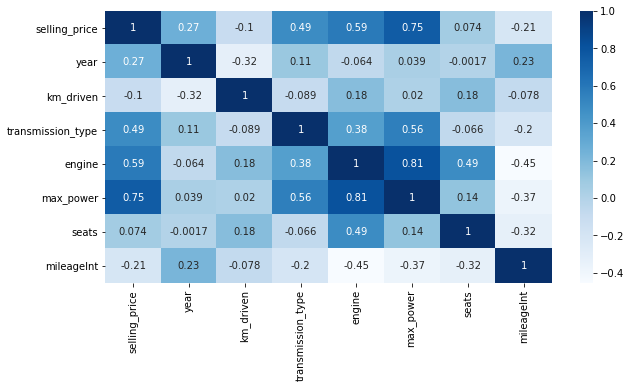

In [35]:
fig = plt.figure(figsize=(10,5))
ax = sns.heatmap(cardekho.corr(), cmap='Blues', annot=True)
plt.show()

In [36]:
cardekho[['year','km_driven','transmission_type','mileageInt','engine','max_power','seats']]

,year,km_driven,transmission_type,mileageInt,engine,max_power,seats
0,2012.0,120000,1,19.70,796,46.30,5
1,2016.0,20000,1,18.90,1197,82.00,5
2,2010.0,60000,1,17.00,1197,80.00,5
3,2012.0,37000,1,20.92,998,67.10,5
4,2015.0,30000,1,22.77,1498,98.59,5
...,...,...,...,...,...,...,...
20021,2017.0,69480,1,23.59,1364,67.05,5
20022,2019.0,18000,1,17.50,1373,91.10,7
20023,2015.0,67000,1,21.14,1498,103.52,5
20024,2016.0,3800000,1,16.00,2179,140.00,7


## 4. Supervised learning. Build regression model for prediction the price of cars.

In [37]:
df = cardekho[['year', 'mileageInt', 'engine', 'max_power', 'transmission_type', 'selling_price']]
df.head()

,year,mileageInt,engine,max_power,transmission_type,selling_price
0,2012.0,19.70,796,46.30,1,120000.0
1,2016.0,18.90,1197,82.00,1,550000.0
2,2010.0,17.00,1197,80.00,1,215000.0
3,2012.0,20.92,998,67.10,1,226000.0
4,2015.0,22.77,1498,98.59,1,570000.0


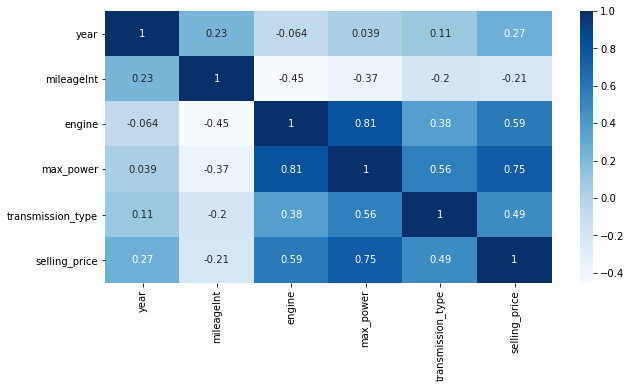

In [38]:
fig = plt.figure(figsize=(10,5))
ax = sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

[Text(0.5, 0, 'Max power'),
 Text(0, 0.5, 'Selling Price'),
 Text(0.5, 1.0, 'Max power vs Selling price')]

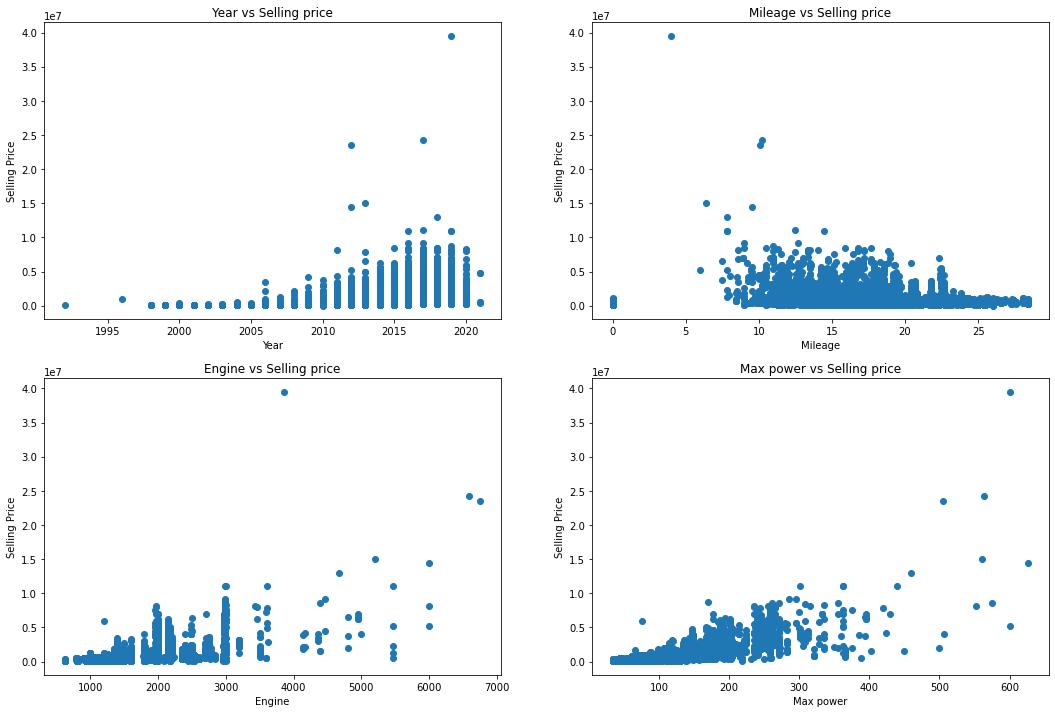

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(18,12))
axs[0][0].scatter(df.year, df.selling_price)
axs[0][0].set(xlabel='Year', ylabel='Selling Price', title='Year vs Selling price')

axs[0][1].scatter(df.mileageInt, df.selling_price)
axs[0][1].set(xlabel='Mileage', ylabel='Selling Price', title='Mileage vs Selling price')

axs[1][0].scatter(df.engine, df.selling_price)
axs[1][0].set(xlabel='Engine', ylabel='Selling Price', title='Engine vs Selling price')

axs[1][1].scatter(df.max_power, df.selling_price)
axs[1][1].set(xlabel='Max power', ylabel='Selling Price', title='Max power vs Selling price')

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

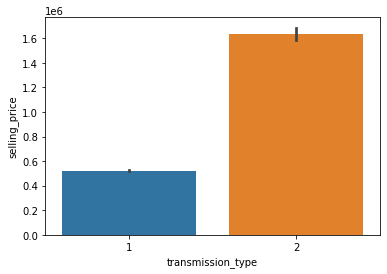

In [40]:
sns.barplot(data=df, x=df.transmission_type, y=df.selling_price)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [42]:
X = df.iloc[:,:-1]
Y = df.selling_price
model_lr = LinearRegression().fit(X, Y)

print("Coefficient: ", model_lr.coef_)
print("Intercept: ", model_lr.intercept_)

Coefficient:  [6.65458993e+04 3.30542075e+03 4.83675049e+01 1.42871043e+04
 1.57168511e+05]
Intercept:  -135064586.96794042


In [43]:
cv_score = cross_val_score(model_lr, X, Y, cv=5)

print("Accuracy: %.2f"%cv_score.mean())
print("Accuracy std: %.2f"%cv_score.std())

Accuracy: 0.62
Accuracy std: 0.05


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=2022)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15635, 5) (15635,)
(3909, 5) (3909,)


In [45]:
model_lr1 = LinearRegression().fit(x_train, y_train)

print("Coefficient: ", model_lr1.coef_)
print("Intercept: ", model_lr1.intercept_)

Coefficient:  [6.66427622e+04 2.80054499e+03 4.16584202e+01 1.46652942e+04
 1.47133308e+05]
Intercept:  -135261762.66159526


In [46]:
cv_score1 = cross_val_score(model_lr1, x_train, y_train, cv=5)

print("Accuracy: %.2f"%cv_score1.mean())
print("Accuracy std: %.2f"%cv_score1.std())

Accuracy: 0.63
Accuracy std: 0.06


In [47]:
def evaluation(true, predicted):  
    R2 = metrics.r2_score(true, predicted)
    MSE = metrics.mean_squared_error(true, predicted)
    MAE = metrics.mean_absolute_error(true, predicted)
    print('R-squared: %.3f' %R2)
    print('MSE: %.3f'%MSE)
    print('RSS: %.3f'%(MSE*len(true)))
    print('MAE: %.3f'%MAE)

In [48]:
predict_y1 = model_lr1.predict(x_test)

evaluation(y_test, predict_y1)

R-squared: 0.662
MSE: 217511218380.957
RSS: 850251352651160.125
MAE: 275639.657


In [49]:
def forward_stepwise_selection(data, target):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns]
    for i in range(1, len(data.columns)+1):
        best_score = 0; best_feature = None
        for feature in remaining_features:
            X = total_features[i-1] + [feature]
            model = LinearRegression().fit(data[X], target)
            score = metrics.r2_score(target, model.predict(data[X]))
            if score > best_score:
                best_score = score
                best_feature = feature
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict


total_features_fwd, score_dict_fwd = forward_stepwise_selection(x_train, y_train)


for i in range(1, len(df.iloc[:,:-1].columns)+1):
    print('The best model with {} features - {}'.format(i,total_features_fwd[i]))
    print('R_2 score is %.3f'%score_dict_fwd[i])
    print()

The best model with 1 features - ['max_power']
R_2 score is 0.560

The best model with 2 features - ['max_power', 'year']
R_2 score is 0.613

The best model with 3 features - ['max_power', 'year', 'transmission_type']
R_2 score is 0.616

The best model with 4 features - ['max_power', 'year', 'transmission_type', 'engine']
R_2 score is 0.616

The best model with 5 features - ['max_power', 'year', 'transmission_type', 'engine', 'mileageInt']
R_2 score is 0.616



<AxesSubplot:xlabel='Number_of_features', ylabel='R2_score'>

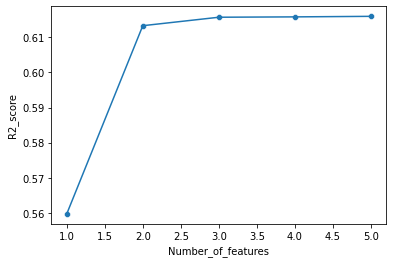

In [50]:
forward_ss = pd.DataFrame({'Number_of_features':np.arange(1,len(total_features_fwd)), 'R2_score':list(score_dict_fwd.values())})
sns.scatterplot(data=forward_ss, x=forward_ss.Number_of_features, y=forward_ss.R2_score)
sns.lineplot(data=forward_ss, x=forward_ss.Number_of_features, y=forward_ss.R2_score)

{1: 1052281480629208.2, 2: 866801828161925.5, 3: 852546297583910.4, 4: 851702287592245.1, 5: 850251352651149.8}


Text(0.5, 1.0, 'Validatoin Approach')

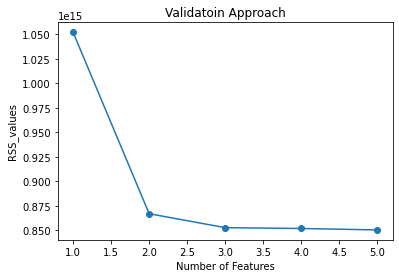

In [51]:
validation_approach_score = {}
for features in total_features_fwd[1:]:
    model = LinearRegression()
    model.fit(x_train[features], y_train)
    score = metrics.mean_squared_error(y_test, model.predict(x_test[features])) * len(y_test)
    validation_approach_score[len(features)] = score
    
    
print(validation_approach_score)
plt.plot(np.arange(1, len(total_features_fwd)), list(validation_approach_score.values()))
plt.scatter(np.arange(1, len(total_features_fwd)), list(validation_approach_score.values()))
plt.xlabel('Number of Features')
plt.ylabel('RSS_values')
plt.title('Validatoin Approach')

{1: 0.43064087722032107, 2: 0.5637236304431368, 3: 0.5726840446017671, 4: 0.5732305429073137, 5: 0.5737847188226026}


Text(0.5, 1.0, 'Adjusted R2 scores')

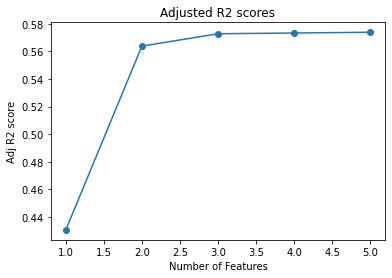

In [52]:
adj_R2_score = {}
for features in total_features_fwd[1:]:
    model = LinearRegression()
    model.fit(x_train[features], y_train)
    score = metrics.r2_score(model.predict(x_test[features]), y_test) 
    p = len(features)
    n = len(x_train)
    adj_r2 = 1-(1-score)*(n-1)/(n-p-1)
    adj_R2_score[len(features)] = adj_r2

print(adj_R2_score)
plt.plot(np.arange(1, len(total_features_fwd)), list(adj_R2_score.values()))
plt.scatter(np.arange(1, len(total_features_fwd)), list(adj_R2_score.values()))
plt.xlabel('Number of Features')
plt.ylabel('Adj R2 score')
plt.title('Adjusted R2 scores')

In [53]:
def best_subset_selection(data, target):
    total_features = [[]]
    score_dict = {}
    for i in range(1, len(data.columns)+1):
        best_score = 0; best_feature = None
        for j in itertools.combinations(data.columns, i):
            X = [c for c in j]
            model = LinearRegression().fit(data[X], target)
            score = metrics.r2_score(target, model.predict(data[X]))
            if score > best_score:
                best_score = score
                best_feature = j
        total_features.append([c for c in best_feature])
        score_dict[i] = best_score
    return total_features,score_dict

total_features_best_ss, score_dict_best_ss = best_subset_selection(x_train, y_train)

for i in range(1, len(df.iloc[:,:-1].columns)+1):
    print('The best model with {} features - {}'.format(i,total_features_best_ss[i]))
    print('R_2 score is %.3f'%score_dict_best_ss[i])
    print()

The best model with 1 features - ['max_power']
R_2 score is 0.560

The best model with 2 features - ['year', 'max_power']
R_2 score is 0.613

The best model with 3 features - ['year', 'max_power', 'transmission_type']
R_2 score is 0.616

The best model with 4 features - ['year', 'engine', 'max_power', 'transmission_type']
R_2 score is 0.616

The best model with 5 features - ['year', 'mileageInt', 'engine', 'max_power', 'transmission_type']
R_2 score is 0.616



<AxesSubplot:xlabel='Number_of_features', ylabel='R2_score'>

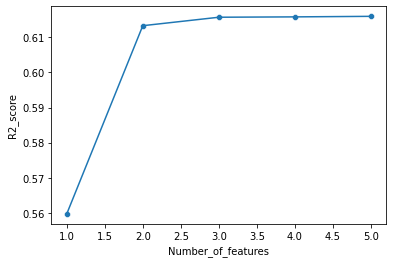

In [54]:
best_ss = pd.DataFrame({'Number_of_features':np.arange(1,len(total_features_best_ss)), 'R2_score':list(score_dict_best_ss.values())})
sns.scatterplot(data=best_ss, x=best_ss.Number_of_features, y=best_ss.R2_score)
sns.lineplot(data=best_ss, x=best_ss.Number_of_features, y=best_ss.R2_score)

{1: 1052281480629208.2, 2: 866801828161928.1, 3: 852546297583913.4, 4: 851702287592259.2, 5: 850251352651160.1}


Text(0.5, 1.0, 'Validatoin Approach')

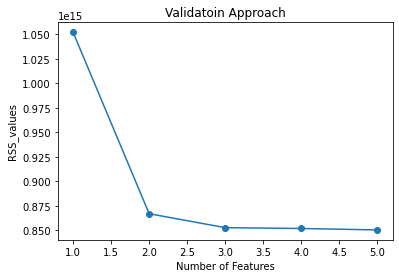

In [55]:
validation_approach_score_bss = {}
for features in total_features_best_ss[1:]:
    model = LinearRegression()
    model.fit(x_train[features], y_train)
    score = metrics.mean_squared_error(y_test, model.predict(x_test[features])) * len(y_test)
    validation_approach_score_bss[len(features)] = score
    
    
print(validation_approach_score_bss)
plt.plot(np.arange(1, len(total_features_best_ss)), list(validation_approach_score_bss.values()))
plt.scatter(np.arange(1, len(total_features_best_ss)), list(validation_approach_score_bss.values()))
plt.xlabel('Number of Features')
plt.ylabel('RSS_values')
plt.title('Validatoin Approach')

{1: 0.43064087722032107, 2: 0.5637236304431368, 3: 0.5726840446017665, 4: 0.5732305429073249, 5: 0.5737847188226173}


Text(0.5, 1.0, 'Adjusted R2 scores')

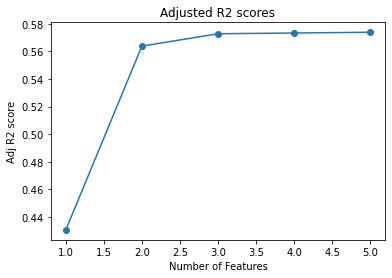

In [56]:
adj_R2_score_bss = {}
for features in total_features_best_ss[1:]:
    model = LinearRegression()
    model.fit(x_train[features], y_train)
    score = metrics.r2_score(model.predict(x_test[features]), y_test) 
    p = len(features)
    n = len(x_train)
    adj_r2 = 1-(1-score)*(n-1)/(n-p-1)
    adj_R2_score_bss[len(features)] = adj_r2

print(adj_R2_score_bss)
plt.plot(np.arange(1, len(total_features_best_ss)), list(adj_R2_score_bss.values()))
plt.scatter(np.arange(1, len(total_features_best_ss)), list(adj_R2_score_bss.values()))
plt.xlabel('Number of Features')
plt.ylabel('Adj R2 score')
plt.title('Adjusted R2 scores')

In [57]:
X2 = sm.add_constant(x_train)
est2 = sm.OLS(y_train, X2)
est3 = est2.fit()
est3.summary2().tables[1]['P>|t|']

const                0.000000e+00
year                 0.000000e+00
mileageInt           1.242876e-02
engine               9.091125e-03
max_power            0.000000e+00
transmission_type    1.816094e-24
Name: P>|t|, dtype: float64

## Ridge Regression

In [58]:
ridge = Ridge(alpha = 100, normalize = False).fit(x_train, y_train)          
pred_y = ridge.predict(x_test)         
print(pd.Series(ridge.coef_, index=x_train.columns))
print(metrics.mean_squared_error(y_test, pred_y)) 

year                 66679.528300 
mileageInt           2766.226929  
engine               40.150475    
max_power            14721.842545 
transmission_type    138606.981884
dtype: float64
217608915589.88763


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [59]:
ridge1 = Ridge(alpha = 100**5, normalize = False).fit(x_train, y_train)          
pred_y1 = ridge1.predict(x_test)         
print(pd.Series(ridge1.coef_, index=x_train.columns))
print(metrics.mean_squared_error(y_test, pred_y1)) 

year                 1.268839  
mileageInt          -0.905034  
engine               310.949622
max_power            38.801281 
transmission_type    0.240850  
dtype: float64
513224430850.99316


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [60]:
ridge2 = Ridge(alpha = 10, normalize = False).fit(x_train, y_train)          
pred_y2 = ridge2.predict(x_test)         
print(pd.Series(ridge2.coef_, index=x_train.columns))
print(metrics.mean_squared_error(y_test, pred_y2)) 

year                 66646.897756 
mileageInt           2796.886506  
engine               41.499491    
max_power            14671.257907 
transmission_type    146233.508295
dtype: float64
217520759989.6195


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' wa

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' wa

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' wa

Text(0, 0.5, 'weights')

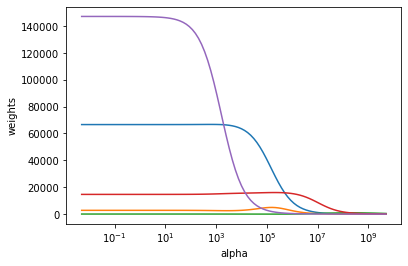

In [61]:
alphas = 10**np.linspace(10, -2, 100) * 0.5
coefficent = []
ridge3 = Ridge(normalize = False)         
for a in alphas:
    ridge3.set_params(alpha=a)
    ridge3.fit(x_train, y_train) 
    coefficent.append(ridge3.coef_)

ax = plt.gca()
ax.plot(alphas, coefficent)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Lasso Regression

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' wa

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' wa

Text(0, 0.5, 'weights')

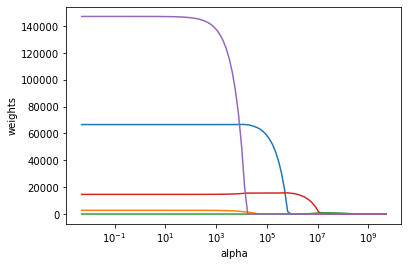

In [62]:
lasso = Lasso(max_iter=100000, normalize=False)
coeffisent = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coeffisent.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coeffisent)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [63]:
reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(x_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(x_test))),2))

Best alpha using built-in LassoCV: 5.585459
Best score using built-in LassoCV: 0.615979
Root Mean Squared Error: 466330.04


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


## KNN for Regression

In [64]:
from sklearn.neighbors import KNeighborsClassifier 

In [65]:
df_new = df.sample(n=1000)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_new.iloc[:,:-1], df_new.selling_price, test_size=0.20, random_state=2022)

In [66]:
def euclidean_distance(train, test):
    distance = 0
    for i in range(len(train)-1):
        distance += (train[i] - test[i])**2
    return distance**0.5
def neighbors(x_train, test, n):
    distances = []
    for train in x_train.values:
        distance = euclidean_distance(train, test)
        distances.append((train, distance))
    distances.sort(key=lambda k: k[1])
    neighbors = []
    for i in range(n):
        neighbors.append(distances[i][0])
    return neighbors
def predict(x_train, x_test, n):
    predict = []
    for test in x_test.values:
        result = neighbors(x_train, test, n)
        neighbor = [i[-1] for i in result]
        predict.append(round(np.mean(neighbor), 2))
    return predict
def get_score(test, pred):
    return round(metrics.mean_squared_error(y_test2, predicted_y), 3)
def get_r2_score(test, pred):
    return round(metrics.r2_score(y_test2, predicted_y), 3)
    
    
kneighbors = np.arange(1, 10, 2)
for i in kneighbors:
    predicted_y = predict(df_new, x_test2, i)
    print('The number of neighbors: {}, then MSE {}'.format(i,get_score(x_test2, predicted_y)))
    print('The number of neighbors: {}, then R2 {}'.format(i,get_r2_score(x_test2, predicted_y)))

The number of neighbors: 1, then MSE 3719555000.0
The number of neighbors: 1, then R2 0.995
The number of neighbors: 3, then MSE 133232388705.521
The number of neighbors: 3, then R2 0.829
The number of neighbors: 5, then MSE 198171454306.746
The number of neighbors: 5, then R2 0.745
The number of neighbors: 7, then MSE 215004965613.916
The number of neighbors: 7, then R2 0.724
The number of neighbors: 9, then MSE 220137002741.68
The number of neighbors: 9, then R2 0.717


## Random Forest for Regression

In [67]:
y = df_new['selling_price']
X = df_new[['year', 'mileageInt', 'engine','max_power']]

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#---Creating the training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=2022)

#---Loading the baseline Random Forest Regressor 
rf = RandomForestRegressor()


#---Fitting the data over training set
rf.fit(X_train, Y_train)



RandomForestRegressor()

In [69]:
y_pred = rf.predict(X_test)

In [70]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8292576485812575

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
parameters = {
    'n_estimators' : [100,500,1000, 1500],
    'criterion' : ['mse', 'mae'],
    'max_depth'    : [4,6,8,10],
    'max_features' : ['auto','sqrt','log2'],
    'min_samples_split' :[2,5,10,20,50],
    'min_samples_leaf': [1,2,5,10]
    
}

In [73]:
random_cv = RandomizedSearchCV(estimator=rf, param_distributions=parameters, n_iter=10, scoring='neg_mean_absolute_error',
                              cv=5, verbose=2, n_jobs=-1)

In [74]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 500, 1000, 1500]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [75]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",random_cv.best_estimator_)
print("\n The best parameters across ALL searched params:\n",random_cv.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='mae', max_depth=6, max_features='sqrt',
                      min_samples_split=10)

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'mae'}


In [76]:
df_new[['year', 'mileageInt', 'engine','max_power','selling_price']]

,year,mileageInt,engine,max_power,selling_price
5030,2018.0,24.00,1186,73.97,550000.0
13173,2016.0,24.00,1120,70.00,425000.0
399,2017.0,23.10,998,67.04,450000.0
1911,2020.0,20.30,1086,68.00,475000.0
1510,2017.0,11.36,2755,171.50,1425000.0
...,...,...,...,...,...
7857,2017.0,18.49,1493,100.00,895000.0
6134,2017.0,20.40,1197,83.11,495000.0
16473,2012.0,21.10,1197,85.80,275000.0
19382,2018.0,24.30,1248,88.50,895000.0


In [77]:
price_pred = [[2017.0, 21.3, 1396, 88.70]]
rf.predict(price_pred)

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([789305.55555556])

In [78]:
best_rf = random_cv.best_estimator_.fit(X_train, Y_train)
Y_pred = best_rf.predict(X_test)
print("R2 score ", round(metrics.r2_score(Y_test, Y_pred), 3))
print("MSE", round(metrics.mean_squared_error(Y_test, Y_pred), 3))

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


R2 score  0.781
MSE 170179298921.617


## 6. Conclusion.

With this, we cover lots of things from visualizing data, cleaning data, evaluating models, and do the price prediction.To improve the prediction or model training, we can apply the adjustment in the model hyper parameter or select only most relevant attributes for our model.

We started with understanding the use case of machine learning  and how machine learning has transformed the driving experience. Moving on, we looked at the various factors that affect the selling price value of a used car and performed exploratory data analysis (EDA). We  have used simple regression algorithms like  Linear Regression, Lasso , Ridge Regression and others  to predict the price value of a used car. Finally, we evaluated the performance of the model using the R squared score.